In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MCMC import MCMCModel

In [17]:
t = np.linspace(0, 10, 100)

model = MCMCModel(t)

# true_a, true_v, _ = model.fit_with_noise(0, 10, -5, 5, 100, 0.1)

a_range = (-2, 2)
v_range = (-4, 4)
num_iterations = 10000
noise_amplitude = 0.001

samples = model.metropolis_hastings(a_range, v_range, num_iterations, noise_amplitude)

i = 0

for sample in samples:
    current_a, current_v = sample
    acceptance_status = "Accepted"
    
    if i > 0:
        previous_a, previous_v = samples[i - 1]
        
        if current_a == previous_a and current_v == previous_v:
            acceptance_status = "Rejected (same as previous)"

    print(f"Trial {i+1}: a = {current_a}, v = {current_v} ({acceptance_status})")
    
    i += 1

Trial 1: a = 0.46243604754007794, v = 0.6983393542047374 (Accepted)
Trial 2: a = -0.26154478469582765, v = 0.31782614630799166 (Accepted)
Trial 3: a = 0.9645119927034798, v = -3.0552956820737442 (Accepted)
Trial 4: a = 0.9645119927034798, v = -3.0552956820737442 (Rejected (same as previous))
Trial 5: a = -0.5004835192448627, v = 2.0958455007701504 (Accepted)
Trial 6: a = 0.3923080823121188, v = -0.5311478682034032 (Accepted)
Trial 7: a = 0.7221185118333455, v = -3.882415057914553 (Accepted)
Trial 8: a = 1.2229177472855923, v = -3.0610843163546795 (Accepted)
Trial 9: a = 0.9503603775804028, v = -3.5968661333319343 (Accepted)
Trial 10: a = -0.4654229880830911, v = 2.7578584461584112 (Accepted)
Trial 11: a = 1.5239552802539453, v = 3.5748665588104256 (Accepted)
Trial 12: a = 0.4793294766878651, v = 3.7458925516282564 (Accepted)
Trial 13: a = 0.4793294766878651, v = 3.7458925516282564 (Rejected (same as previous))
Trial 14: a = 0.4793294766878651, v = 3.7458925516282564 (Rejected (same as 

In [4]:
samples_array = np.array(samples)

In [5]:
v_samples = samples_array[:,1]
a_samples = samples_array[:,0]

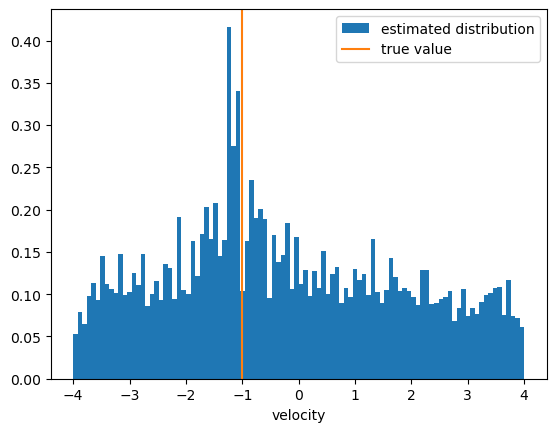

In [6]:
plt.hist(v_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("velocity")
ylim = plt.ylim()
yx =plt.gca()
plt.plot([-1,-1], ylim, label = "true value")
yx.set_ylim(ylim)
plt.legend()

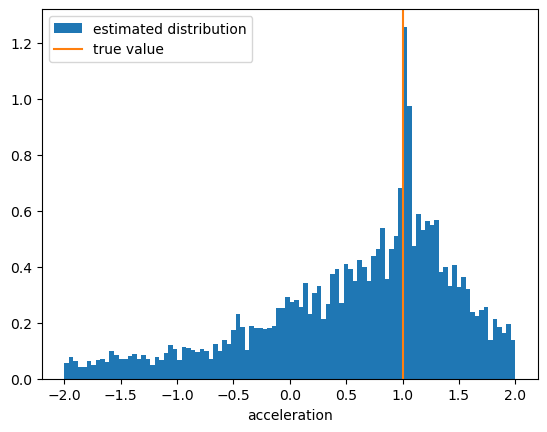

In [7]:
plt.hist(a_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("acceleration")
ylim = plt.ylim()
ax = plt.gca()
plt.plot([1,1], ylim, label = "true value")
ax.set_ylim(ylim)
plt.legend()

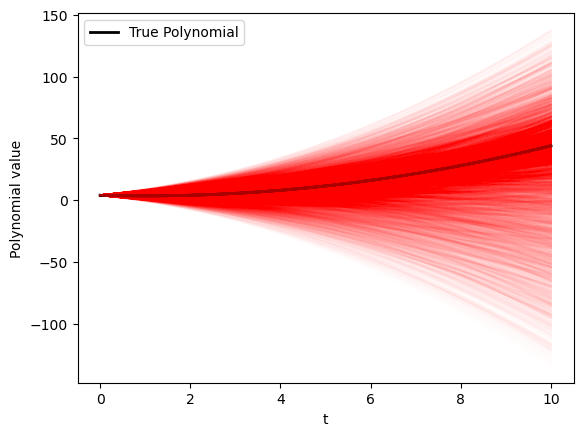

In [8]:
true_polynomial = model.polynomial(v=-1, a=1)
plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)

for sample in samples:
    current_a, current_v = sample
    plt.plot(t, model.polynomial(v=current_v, a=current_a), "r-", alpha=0.01)

plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()


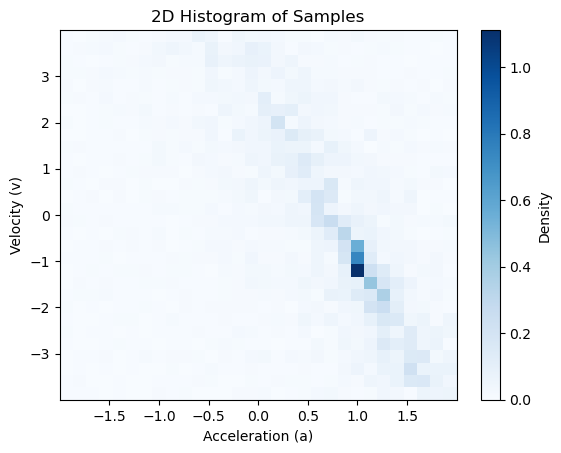

In [9]:
plt.figure()
plt.hist2d(a_samples, v_samples, bins=30, density=True, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Acceleration (a)')
plt.ylabel('Velocity (v)')
plt.title('2D Histogram of Samples')
plt.show()

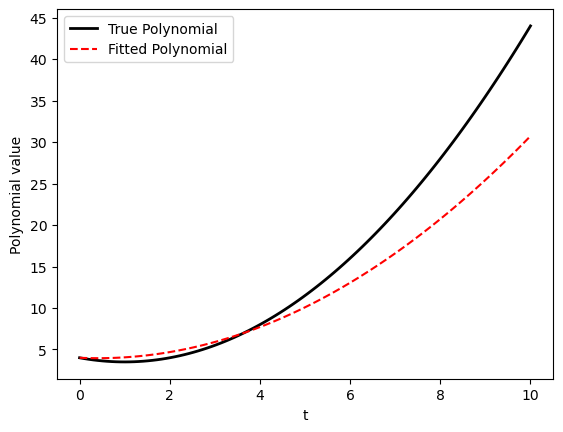

In [16]:
all_t = np.tile(t, len(samples))
all_f = np.hstack([model.polynomial(v=sample[1], a=sample[0]) for sample in samples])

fitted_poly = Polynomial.fit(all_t, all_f, degree)

plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)
plt.plot(t, fitted_poly(t), label='Fitted Polynomial', color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()